# Bloch Theorem

#### In essense, the Block theorem states that the electron's behavior is modulated by the periodic external potential imposed by the lattice structure. Thus the wavefunction ($\psi$) of the electrons in a crystal can be nicely written into the multiplications of two parts, one of them is a simple planewave ($e^{i\vec{k}\vec{x}}$) throughout the entire lattice space, while the other part is a periodic function ($\phi(x)$) that can be determined by simply examing one single atomic site with the periodic boundary condition constraints

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as ipw
import matplotlib.pyplot as plt

from scipy.integrate import solve_bvp
from bokeh.io import push_notebook, output_notebook, show
from bokeh.layouts import row, column
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
output_notebook()

from ipywidgets import interact

Loading BokehJS ...

### First, we define a function representing the external potential electrons feel near the (equilibrium) atomic positions
#### Here we use a Dirac Delta function of width "w" and amplitude "A" to describe the potential. The negative amplitude signifies the attractive nature of the interaction between atoms and electrons, the atomic site is implicitly defined to be at the point of origin.

In [2]:
def delta(x,w,A):
     return A/(w*np.sqrt(np.pi))*np.exp(-x**2/w**2)
def potential(x):
    return delta(x,w,A)

### Next, after setting the values of the various parameters (potential amplitude, width, query points, etc) . We can plot the external potential electron feels at a single atomic site

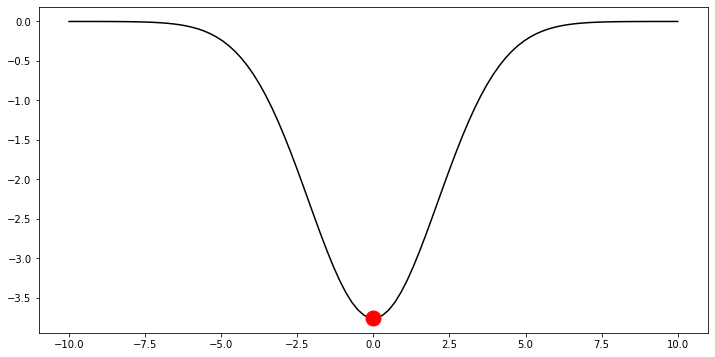

In [3]:
s = 10; # Crystallography period
x = np.linspace(-s,s,100);
w = 3; # ionic potential (delta function) width
A = -20; # ionic potential (delta function) applitude
fig0,ax0 = plt.figure(figsize = (12,6)),plt.gca()
pot0 = plt.plot(x,potential(x),'k')
atom0 = plt.plot(0,min(potential(x)),'ro',ms = 15)

### Having determined the external potential. As we know, we can then partition the electron wavefunction into two parts, then by applying Schrodinger equation to this anzats, we end up with a Schrodinger equation-like second order differential equation (ODE), which can be used to solve for the periodic function part of the electron wavefunction.
#### In solving the Schrodinger-like equation, we have to make a substitution of variable to rewrite the 2nd order OED into a first order one, then we proceed by defining a function that returns the right-hand-side of both the first and second order derivatives of the function under investigation. In the process of doing so, we set our energy reference to 0, and thus as we are only investigating the ground state, the right hand side of the Schrodinger equation is eliminated.
#### Also, we impose the boundary condition as a callable function. In the ideal single ion scenario, the potential should vanish at points infinitely far away from the atom, and hence the wavefunction amplitude should recover to 1 (with a phase chosen as 2$\pi$) at these points.
#### Once all of these are set, we then call the built-in function from scipy library to solve the ODE under the constraint of boundary condition with an initial guess. The results are ploted as the probability distribution ($\phi^{\dagger}\cdot\phi$) along side with the external potential (black line), (equilibrium) atomic site (red dot).

In [4]:
def bloch(x,u):
    k = 2*np.pi/(2*w)
    return np.vstack((u[1],(k**2 + delta(x,w,A))*u[0]+2*1j*k*u[1]))

def bc(x,u):
    return np.array([x[0],u[0]]);

/home/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


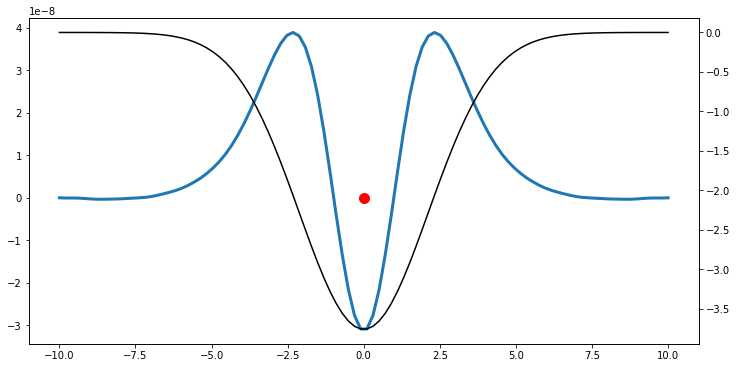

In [5]:
u0 = np.zeros((2,x.size));
u0[0] = 1;
ws = solve_bvp(bloch,bc,x,u0);
phi = ws.sol(x)[0];
fig1,ax1 = plt.figure(figsize = (12,6)), plt.gca();
prob = ax1.plot(x,np.real(phi),linewidth = 3);
atom1 = ax1.plot(0,0,'ro',ms = 10)
ax2 = ax1.twinx();
pot1 = ax2.plot(x,potential(x),'k');

#### As mentioned before, the other part of the Bloch wavefunction is simple a planewave, the real part of the planewave function is shown below:

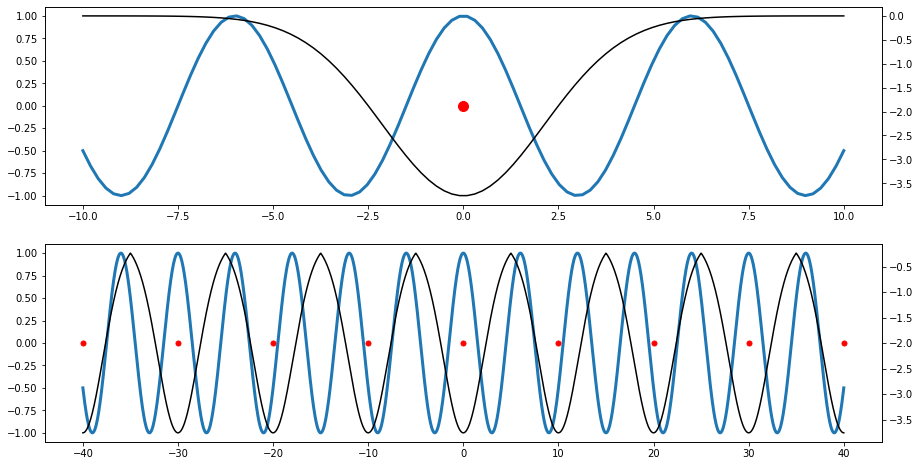

In [6]:
x1 = np.linspace(-4*s,4*s,2000);
k = 2*np.pi/(2*w);
def py(x):
    return np.exp(1j*k*x);
fig2 = plt.figure(figsize = (15,8)) 
ax3 = fig2.add_subplot(211);
plane = ax3.plot(x,np.real(py(x)),linewidth = 3); # Planewave (single site)
atom2 = ax3.plot(0,0,'ro',ms = 10)
ax4 = ax3.twinx() ;
pot2 = ax4.plot(x,potential(x),'k'); # External potential (single site)

ax5 = fig2.add_subplot(212)
plane = ax5.plot(x1,np.real(py(x1)),linewidth = 3); # Planewave (multiple sites)
atom3 = ax5.plot(np.arange(np.min(x1),np.max(x1)+s,s),[0]*(int(np.ptp(x1)/s)+1),'ro',ms = 5)
ax6 = ax5.twinx() ;
pot3 = ax6.plot(x1,potential( (x1-s/2)%s-s/2 ),'k'); # External potential (multiple sites)

### Now we are ready to put the two parts of the wavefunction into one ($\psi(x) = e^{i\vec{k}\vec{x}}\phi(x)$), whose real part (blue line) is plotted along with the potential (black line) and the atomic sites (red dots). 

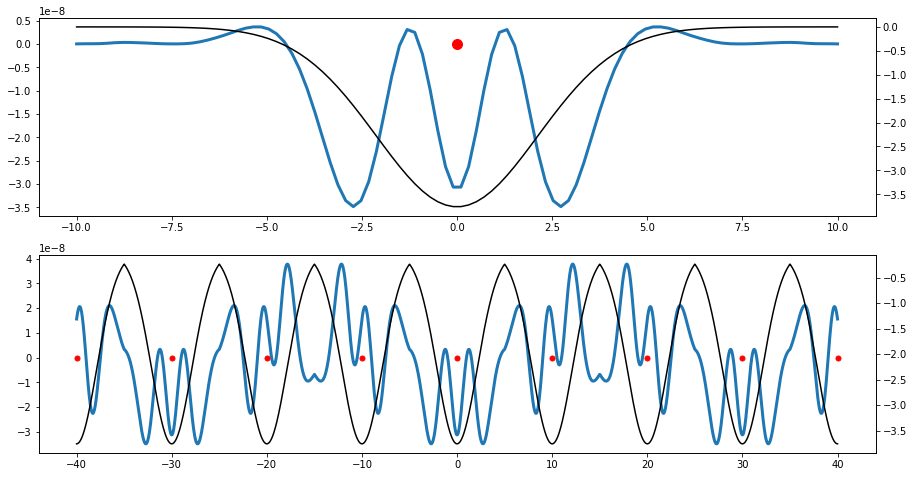

In [7]:
fig3 = plt.figure(figsize = (15,8)) 
ax7 = fig3.add_subplot(211);
psi0 = py(x) * ws.sol(x)[0];
modul = ax7.plot(x,np.real(psi0),linewidth = 3); # Mudulated wavefunction (single site)
atom4 = ax7.plot(0,0,'ro',ms = 10)
ax8 = ax7.twinx() ;
pot4 = ax8.plot(x,potential(x),'k'); # External potential (single site)

ax9 = fig3.add_subplot(212)
psi1 = py(x1) * ws.sol( (x1-s/2)%s-s/2 )[0];
wavefunc = ax9.plot(x1,np.real(psi1),linewidth = 3); # Wavefunction (multiple sites)
atom5 = ax9.plot(np.arange(np.min(x1),np.max(x1)+s,s),[0]*(int(np.ptp(x1)/s)+1),'ro',ms = 5)
ax10 = ax9.twinx() ;
pot5 = ax10.plot(x1,potential( (x1-s/2)%s-s/2 ),'k'); # External potential (multiple sites)